In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
FGSM_normed_dif = pd.read_csv("results/FGSM/FGSM-average_normed_differences.csv")
BIM_normed_dif = pd.read_csv("results/BIM/BIM-average_normed_differences.csv")
deepFool_normed_dif = pd.read_csv("results/DeepFool/DeepFool-average_normed_differences.csv")

In [4]:
FGSM_normed_dif.head()

,Unnamed: 0,Sample,Epsilon,Normed diff
0,0,0,1.0,0.030058
1,1,2,14.0,0.419955
2,2,3,1.0,0.030059
3,3,4,1.0,0.030057
4,4,5,1.0,0.030059


In [5]:
clean_preds = pd.read_csv("results/Clean-Predictions.csv")
clean_preds = clean_preds.rename(columns={"Unnamed: 0": "Sample"})

In [6]:
clean_preds.loc[clean_preds["Accuracy Top 1"]==1]

,Sample,Class Index,Accuracy Top 1,Accuracy Top 5,Confidence 1,Confidence 2,Confidence 3,Confidence 4,Confidence 5
0,0,305,1,1,0.521527,0.296090,0.049534,0.021177,0.019621
2,2,243,1,1,0.846168,0.088765,0.010136,0.007451,0.003816
3,3,559,1,1,0.994146,0.001886,0.000936,0.000512,0.000335
4,4,438,1,1,0.602645,0.033172,0.019846,0.012104,0.012037
5,5,990,1,1,0.812574,0.012691,0.011759,0.010364,0.007087
...,...,...,...,...,...,...,...,...,...
994,994,141,1,1,0.927138,0.012345,0.012085,0.007547,0.003764
995,995,526,1,1,0.338009,0.044050,0.037709,0.036085,0.029635
996,996,703,1,1,0.485719,0.119430,0.052322,0.036498,0.032390
998,998,562,1,1,0.555623,0.085327,0.017704,0.015831,0.015100


In [15]:
clean_preds.loc[clean_preds["Accuracy Top 1"]==1, 'Sample'].equals(FGSM_normed_dif['Sample'])

False

In [10]:
FGSM_normed_dif['Sample']

0        0
1        2
2        3
3        4
4        5
      ... 
839    994
840    995
841    996
842    998
843    999
Name: Sample, Length: 844, dtype: int64

In [13]:
clean_preds.loc[clean_preds["Accuracy Top 1"]==1, 'Sample']

0        0
2        2
3        3
4        4
5        5
      ... 
994    994
995    995
996    996
998    998
999    999
Name: Sample, Length: 844, dtype: int64

In [23]:
clean_preds.loc[clean_preds["Accuracy Top 1"]==1].merge(BIM_normed_dif,how='inner',on='Sample')

,Sample,Class Index,Accuracy Top 1,Accuracy Top 5,Confidence 1,Confidence 2,Confidence 3,Confidence 4,Confidence 5,Unnamed: 0,Epsilon,Normed diff
0,0,305,1,1,0.521527,0.296090,0.049534,0.021177,0.019621,0,1.0,0.019839
1,2,243,1,1,0.846168,0.088765,0.010136,0.007451,0.003816,1,2.0,0.040773
2,3,559,1,1,0.994146,0.001886,0.000936,0.000512,0.000335,2,1.0,0.020313
3,4,438,1,1,0.602645,0.033172,0.019846,0.012104,0.012037,3,1.0,0.018845
4,5,990,1,1,0.812574,0.012691,0.011759,0.010364,0.007087,4,1.0,0.020802
...,...,...,...,...,...,...,...,...,...,...,...,...
839,994,141,1,1,0.927138,0.012345,0.012085,0.007547,0.003764,839,1.0,0.019288
840,995,526,1,1,0.338009,0.044050,0.037709,0.036085,0.029635,840,1.0,0.020823
841,996,703,1,1,0.485719,0.119430,0.052322,0.036498,0.032390,841,1.0,0.020223
842,998,562,1,1,0.555623,0.085327,0.017704,0.015831,0.015100,842,1.0,0.020241


In [50]:
def set_confidence_ranges(confidence):
    if confidence >= 0.2 and confidence < 0.4:
        return '20%-40%'
    elif confidence < 0.6:
        return '40%-60%'
    elif confidence < 0.85:
        return '60%-85%'
    elif confidence < 0.90:
        return '85%-90%'
    elif confidence < 0.95:
        return '90%-95%'
    elif confidence < 0.99:
        return '95%-99%'
    elif confidence <= 1.0:
        return '99%-100%'
    else:
        return 'N/A'

In [51]:
clean_preds['Confidence Range'] = clean_preds.apply(lambda x: set_confidence_ranges(x['Confidence 1']), axis=1)

In [55]:
preds = clean_preds.loc[(clean_preds['Confidence Range'] != 'N/A') & clean_preds['Accuracy Top 1'] == 1, ['Sample', 'Confidence Range']]

In [43]:
FGSM_normed_dif[['Sample', 'Normed diff']]

,Sample,Normed diff
0,0,0.030058
1,2,0.419955
2,3,0.030059
3,4,0.030057
4,5,0.030059
...,...,...
839,994,0.000000
840,995,0.030056
841,996,0.030051
842,998,0.029853


In [56]:
clean_preds.loc[(clean_preds['Confidence Range'] == 'N/A') & clean_preds['Accuracy Top 1'] == 1]

,Sample,Class Index,Accuracy Top 1,Accuracy Top 5,Confidence 1,Confidence 2,Confidence 3,Confidence 4,Confidence 5,Confidence Range


In [57]:
preds

,Sample,Confidence Range
0,0,40%-60%
2,2,60%-85%
3,3,99%-100%
4,4,60%-85%
5,5,60%-85%
...,...,...
994,994,90%-95%
995,995,20%-40%
996,996,40%-60%
998,998,40%-60%


In [59]:
FGSM = FGSM_normed_dif.merge(preds, on='Sample', how='inner')
BIM = BIM_normed_dif.merge(preds, on='Sample', how='inner')
deepFool = deepFool_normed_dif.merge(preds, on='Sample', how='inner')

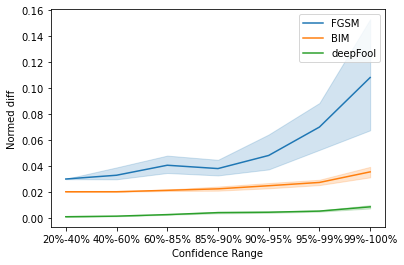

In [72]:
sns.lineplot(x='Confidence Range', y='Normed diff',data=FGSM,label='FGSM',legend='brief')
sns.lineplot(x='Confidence Range', y='Normed diff',data=BIM, label='BIM', legend='brief')
sns.lineplot(x='Confidence Range', y='Normed diff',data=deepFool, label='deepFool',legend='brief')

In [71]:
deepFool

,Unnamed: 0,Sample,Normed diff,Confidence Range
0,0,0,0.000440,40%-60%
1,1,2,0.002786,60%-85%
2,2,3,0.004420,99%-100%
3,3,4,0.001412,60%-85%
4,4,5,0.002910,60%-85%
...,...,...,...,...
839,839,994,0.003533,90%-95%
840,840,995,0.001558,20%-40%
841,841,996,0.001969,40%-60%
842,842,998,0.001444,40%-60%
